In [86]:
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../")

In [87]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from stats_arb.tests import adf_test, kpss_test, cal_half_life, pp_test
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

# DATA_PATH = '/mnt/d/Trading/trading-agent/crypto-pair-trading/data/5min'
# DATA_PATH = '/mnt/d/Working/PersonalProjects/Trading/trading-agent/crypto-pair-trading/data/crypto/1h'
DATA_PATH = '/mnt/d/Working/PersonalProjects/Trading/trading-agent/crypto-pair-trading/data/us_stocks/stocks'

In [88]:
table_S = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table_S = table_S[0]
symbols = table_S.Symbol.tolist()

In [89]:
supported_mt5 = [
  "1COV",
  "A",
  "AA",
  "AAL",
  "AALB",
  "AALG",
  "AAPL",
  "ABBVIE",
  "ABCC",
  "ABDN",
  "ABF",
  "ABMD",
  "ABN",
  "ABNB",
  "ABT",
  "AC",
  "ACA",
  "ACN",
  "ADAUSD",
  "ADBE",
  "ADI",
  "ADM",
  "ADP",
  "ADPR",
  "ADS",
  "ADSK",
  "ADYEN",
  "AENA",
  "AEP",
  "AFG",
  "AFL",
  "AFX",
  "AGG",
  "AGN",
  "AGNC",
  "AHT",
  "AI",
  "AIG",
  "AIR",
  "AKAM",
  "AKZA",
  "ALB",
  "ALGN",
  "ALGUSD",
  "ALIBABA",
  "ALK",
  "ALLC",
  "ALV",
  "AMAT",
  "AMAZON",
  "AMCX",
  "AMD",
  "AMGN",
  "AMPF",
  "AMS",
  "AMT",
  "AMUN",
  "AMWL",
  "ANA",
  "ANTO",
  "AON",
  "APA",
  "APD",
  "APH",
  "APTV",
  "ARKG",
  "ARKK",
  "ARKQ",
  "ARKW",
  "ASM",
  "ASML",
  "ASRNL",
  "AT&T",
  "ATMUSD",
  "ATOS",
  "ATVI",
  "AUDCAD-VIP",
  "AUDCHF-VIP",
  "AUDCNH-VIP",
  "AUDJPY-VIP",
  "AUDNZD-VIP",
  "AUDSGD-VIP",
  "AUDUSD",
  "AUDUSD-VIP",
  "AUPH",
  "AUTO",
  "AUY",
  "AVAUSD",
  "AVB",
  "AVGO",
  "AVIVA",
  "AVV",
  "AXP",
  "AXSUSD",
  "AYX",
  "AZN",
  "AZO",
  "BAC",
  "BAE",
  "BAIDU",
  "BAP",
  "BARC",
  "BAS",
  "BATS",
  "BATUSD",
  "BAX",
  "BAYN",
  "BB",
  "BBBY",
  "BBD",
  "BBVA",
  "BBWI",
  "BBY",
  "BCHUSD",
  "BCP",
  "BDEV",
  "BDX",
  "BE",
  "BEI",
  "BEN",
  "BIIB",
  "BITQ",
  "BK",
  "BKCH",
  "BKG",
  "BKNG",
  "BKR",
  "BLCN",
  "BLDP",
  "BLK",
  "BLND",
  "BLNK",
  "BLOK",
  "BMBL",
  "BMRN",
  "BMW",
  "BMY",
  "BN",
  "BNBUSD",
  "BND",
  "BNDX",
  "BNGO",
  "BNO",
  "BNP",
  "BNR",
  "BNTX",
  "BNZL",
  "BOEING",
  "BOX",
  "BP",
  "BRBY",
  "BRKB",
  "BSX",
  "BT.A",
  "BTCBCH",
  "BTCETH",
  "BTCEUR",
  "BTCLTC",
  "BTCUSD",
  "BUD",
  "BVSPX.",
  "BX",
  "BYND",
  "CA",
  "CABK",
  "CADCHF-VIP",
  "CADJPY-VIP",
  "CAH",
  "CAP",
  "CAT",
  "CB",
  "CBK",
  "CBOE",
  "CCH",
  "CCI",
  "CCL",
  "CDI",
  "CDNS",
  "CFG",
  "CGC",
  "CHFJPY-VIP",
  "CHFSGD-VIP",
  "CHINA50.",
  "CHINA50ft.",
  "CHKP",
  "CHPT",
  "CHTR",
  "CHWY",
  "CI",
  "CIB",
  "CIM",
  "CISCO",
  "CITI",
  "CL",
  "CL-OIL-VIP",
  "CLNX",
  "CLX",
  "CMA",
  "CMCSA",
  "CME",
  "CMI",
  "CNA",
  "CNC",
  "COF",
  "COIN",
  "CON",
  "COP",
  "COPPER-C.",
  "COST",
  "COTY",
  "CPG",
  "CPNG",
  "CPRI",
  "CRDA",
  "CRH",
  "CRM",
  "CRON",
  "CRVUSD",
  "CRWD",
  "CS",
  "CSX",
  "CTAS",
  "CTRA",
  "CTSH",
  "CVAC",
  "CVS",
  "CVX",
  "Cocoa-C.",
  "Coffee-C.",
  "Cotton-C.",
  "D",
  "DAL",
  "DASH",
  "DAST",
  "DAX40.",
  "DAX40ft.",
  "DB1",
  "DBA",
  "DBC",
  "DBK",
  "DBX",
  "DCC",
  "DD",
  "DDOG",
  "DE",
  "DELL",
  "DFS",
  "DG",
  "DGC",
  "DHER",
  "DHI",
  "DHR",
  "DIAGEO",
  "DIM",
  "DISH",
  "DISNEY",
  "DJ30.",
  "DJ30ft.",
  "DKNG",
  "DLR",
  "DLTR",
  "DOCU",
  "DOGUSD",
  "DOTUSD",
  "DOW",
  "DPW",
  "DSM",
  "DTE",
  "DUK",
  "DVN",
  "DWNI",
  "DWS",
  "DXC",
  "DXCM",
  "EA",
  "EBAY",
  "EC",
  "ECL",
  "ED",
  "EDP",
  "EEM",
  "EFA",
  "EL",
  "ELE",
  "EMN",
  "EMR",
  "EN",
  "ENGI",
  "ENPH",
  "ENT",
  "EOAN",
  "EOG",
  "EOSUSD",
  "EPD",
  "EQIX",
  "EQR",
  "ES35.",
  "ESGV",
  "ESL",
  "ESS",
  "ETCUSD",
  "ETD",
  "ETHBCH",
  "ETHEUR",
  "ETHLTC",
  "ETHUSD",
  "ETN",
  "ETSY",
  "EU50.",
  "EURAUD-VIP",
  "EURCAD-VIP",
  "EURCHF-VIP",
  "EURGBP-VIP",
  "EURJPY-VIP",
  "EURNOK-VIP",
  "EURNZD-VIP",
  "EURPLN-VIP",
  "EURSEK-VIP",
  "EURSGD-VIP",
  "EURTRY-VIP",
  "EURUSD",
  "EURUSD-VIP",
  "EW",
  "EXC",
  "EXPE",
  "EXPN",
  "EXXON",
  "EZJ",
  "F",
  "FANG",
  "FAS",
  "FAST",
  "FAZ",
  "FCEL",
  "FCX",
  "FDN",
  "FDX",
  "FEI",
  "FERG",
  "FGBL",
  "FGBM",
  "FGBS",
  "FGBX",
  "FIE",
  "FILUSD",
  "FIS",
  "FISV",
  "FITB",
  "FL",
  "FLG",
  "FLTR",
  "FME",
  "FOSL",
  "FOX",
  "FOXA",
  "FP",
  "FRA",
  "FRA40.",
  "FRAS",
  "FRE",
  "FRES",
  "FSLR",
  "FTI",
  "FTNT",
  "FTSE100.",
  "FTSE100ft.",
  "FTV",
  "FUV",
  "FXI",
  "G24",
  "GALP",
  "GAS-C.",
  "GASOIL-C.",
  "GBPAUD-VIP",
  "GBPCAD-VIP",
  "GBPCHF-VIP",
  "GBPJPY-VIP",
  "GBPNZD-VIP",
  "GBPSGD-VIP",
  "GBPUSD",
  "GBPUSD-VIP",
  "GBXUSD",
  "GD",
  "GDX",
  "GDXJ",
  "GE",
  "GEVO",
  "GFI",
  "GFS",
  "GILD",
  "GIS",
  "GLD",
  "GLE",
  "GLEN",
  "GLPG",
  "GLW",
  "GM",
  "GNRC",
  "GOAU",
  "GOEX",
  "GOLD",
  "GOOG",
  "GPN",
  "GPRO",
  "GPS",
  "GRID",
  "GRPN",
  "GS",
  "GSG",
  "GSK",
  "GT",
  "GWW",
  "HAL",
  "HBAN",
  "HCA",
  "HD",
  "HEI",
  "HEIA",
  "HEN3",
  "HES",
  "HIK",
  "HK50.",
  "HK50ft.",
  "HL",
  "HLAG",
  "HLF",
  "HLMA",
  "HLT",
  "HNR1",
  "HOG",
  "HON",
  "HOOD",
  "HOT",
  "HPE",
  "HPQ",
  "HRB",
  "HRMS",
  "HSBA",
  "HSBCn",
  "HSX",
  "HSY",
  "HTHT",
  "HUBS",
  "HUM",
  "HUT",
  "HYLN",
  "IAC",
  "IBE",
  "IBM",
  "ICE",
  "ICLN",
  "IDXX",
  "IFX",
  "IHG",
  "III",
  "ILMN",
  "IMB",
  "IMCD",
  "INCUSD",
  "INCY",
  "INDIA50.",
  "INF",
  "INGA",
  "INO",
  "INSG",
  "INTEL",
  "INTU",
  "IOTUSD",
  "IOVA",
  "IP",
  "IQV",
  "IR",
  "ISRG",
  "ITRK",
  "ITV",
  "ITW",
  "ITX",
  "IVZ",
  "IWM",
  "IYW",
  "JBL",
  "JCI",
  "JD",
  "JDI",
  "JMAT",
  "JNJ",
  "JNUG",
  "JPM",
  "JWN",
  "K",
  "KBX",
  "KDP",
  "KER",
  "KEY",
  "KGC",
  "KGF",
  "KGX",
  "KHC",
  "KKR",
  "KLAC",
  "KMB",
  "KMI",
  "KO",
  "KODK",
  "KR",
  "KRN",
  "KSS",
  "LAC",
  "LAND",
  "LAUR",
  "LAZR",
  "LBTYK",
  "LC",
  "LCID",
  "LEG",
  "LEN",
  "LEVI",
  "LGEN",
  "LHX",
  "LI",
  "LIN",
  "LLOY",
  "LLY",
  "LMT",
  "LNKUSD",
  "LOW",
  "LR",
  "LRCUSD",
  "LRCX",
  "LSEG",
  "LTCUSD",
  "LTHM",
  "LULU",
  "LUMN",
  "LUV",
  "LVMH",
  "LVS",
  "LYB",
  "LYFT",
  "M",
  "MA",
  "MANU",
  "MAP",
  "MAR",
  "MARA",
  "MAT",
  "MBG",
  "MCD",
  "MCHP",
  "MCK",
  "MCO",
  "MDLZ",
  "MDT",
  "MELI",
  "MET",
  "META",
  "MFA",
  "MFC",
  "MGM",
  "MKRUSD",
  "ML",
  "MLM",
  "MMC",
  "MMM",
  "MNDI",
  "MNG",
  "MNST",
  "MNTV",
  "MO",
  "MOH",
  "MOMO",
  "MPC",
  "MPLX",
  "MPWR",
  "MRCK",
  "MRK",
  "MRNA",
  "MRO",
  "MRVL",
  "MS",
  "MSFT",
  "MT",
  "MTB",
  "MTCH",
  "MTCUSD",
  "MTX",
  "MU",
  "MUV2",
  "NAS100.",
  "NAS100ft.",
  "NBIX",
  "NBR",
  "NCLH",
  "NEE",
  "NEM",
  "NEMD",
  "NEOUSD",
  "NERUSD",
  "NET",
  "NETW",
  "NFLX",
  "NG-C.",
  "NGRID",
  "NIO",
  "NKE",
  "NKLA",
  "NN",
  "NOC",
  "NOW",
  "NSC",
  "NTAP",
  "NTES",
  "NTRS",
  "NUE",
  "NUGT",
  "NVAX",
  "NVIDIA",
  "NVS",
  "NWG",
  "NWS",
  "NXPI",
  "NXT",
  "NZDCAD-VIP",
  "NZDCHF-VIP",
  "NZDJPY-VIP",
  "NZDSGD-VIP",
  "NZDUSD",
  "NZDUSD-VIP",
  "Nikkei225.",
  "OCDO",
  "OIH",
  "OIS",
  "OJ-C.",
  "OKE",
  "OKTA",
  "OMC",
  "ONEUSD",
  "OPFI",
  "OR",
  "ORA",
  "ORCL",
  "ORLY",
  "OSTK",
  "OXY",
  "PANW",
  "PAYX",
  "PCAR",
  "PCG",
  "PEG",
  "PENN",
  "PEP",
  "PFC",
  "PFIZER",
  "PG",
  "PGR",
  "PH",
  "PHIA",
  "PHNX",
  "PINS",
  "PLAY",
  "PLD",
  "PLTR",
  "PLUG",
  "PM",
  "PNC",
  "POLY",
  "POOL",
  "PPG",
  "PPL",
  "PRU",
  "PRX",
  "PSA",
  "PSH",
  "PSN",
  "PSON",
  "PSX",
  "PTON",
  "PUBP",
  "PUM",
  "PVH",
  "PXD",
  "PYPL",
  "QCLN",
  "QCOM",
  "QQQ",
  "QRTEA",
  "QS",
  "RAA",
  "RACE",
  "RAND",
  "RB",
  "RBLX",
  "RCL",
  "REGN",
  "RELX",
  "REP",
  "RF",
  "RGLD",
  "RI",
  "RIG",
  "RING",
  "RIO",
  "RIOT",
  "RIVN",
  "RL",
  "RMV",
  "RNG",
  "RNO",
  "ROK",
  "ROKU",
  "ROO",
  "ROP",
  "ROST",
  "RR",
  "RRTL",
  "RSG",
  "RTO",
  "RTX",
  "RWE",
  "SA40.",
  "SAB",
  "SAF",
  "SANOFI",
  "SANTANDER",
  "SANUSD",
  "SAP",
  "SAVE",
  "SBRY",
  "SBUX",
  "SCHW",
  "SDR",
  "SDS",
  "SE",
  "SENS",
  "SGDJ",
  "SGDJPY-VIP",
  "SGDM",
  "SGE",
  "SGO",
  "SGRO",
  "SHBUSD",
  "SHELL",
  "SHL",
  "SHOP",
  "SHW",
  "SIE",
  "SIG",
  "SIRI",
  "SIX",
  "SKG",
  "SLB",
  "SLVP",
  "SMDS",
  "SMG",
  "SMIN",
  "SMT",
  "SN",
  "SNAP",
  "SNOW",
  "SNPS",
  "SO",
  "SOFI",
  "SOLUSD",
  "SON",
  "SOP",
  "SP500.",
  "SP500ft.",
  "SPCE",
  "SPG",
  "SPGI",
  "SPI200.",
  "SPLK",
  "SPOT",
  "SPX",
  "SPY",
  "SPYX",
  "SQ",
  "SRE",
  "SRNE",
  "SRT3",
  "SSE",
  "STAN",
  "STJ",
  "STLA",
  "STM",
  "STT",
  "STX",
  "STZ",
  "SU",
  "SUSUSD",
  "SVT",
  "SW",
  "SWK",
  "SWKS",
  "SY1",
  "SYF",
  "SYK",
  "SYY",
  "Soybean-C.",
  "Sugar-C.",
  "TAN",
  "TCFP",
  "TCOM",
  "TDOC",
  "TEAM",
  "TEF",
  "TEL",
  "TESCO",
  "TFC",
  "TGT",
  "TJX",
  "TKWY",
  "TLX",
  "TMO",
  "TMUS",
  "TOYOTA",
  "TRIP",
  "TRMB",
  "TROW",
  "TRST",
  "TRV",
  "TRXUSD",
  "TSLA",
  "TSM",
  "TSN",
  "TTCF",
  "TTD",
  "TTWO",
  "TUI",
  "TUP",
  "TW",
  "TWLO",
  "TXN",
  "TY",
  "U",
  "UA",
  "UAL",
  "UBER",
  "UKOUSD-VIP",
  "UKOUSDft-V",
  "UL",
  "ULTA",
  "ULVR",
  "UN01",
  "UNA",
  "UNH",
  "UNIUSD",
  "UNP",
  "UPS",
  "UPST",
  "URW",
  "US2000.",
  "USB",
  "USDBRL",
  "USDBRL-VIP",
  "USDCAD",
  "USDCAD-VIP",
  "USDCHF-VIP",
  "USDCNH-VIP",
  "USDHKD",
  "USDINR-VIP",
  "USDJPY",
  "USDJPY-VIP",
  "USDMXN-VIP",
  "USDNOK-VIP",
  "USDPLN-VIP",
  "USDSEK-VIP",
  "USDSGD",
  "USDSGD-VIP",
  "USDTRY-VIP",
  "USDX.",
  "USDZAR",
  "USDZAR-VIP",
  "USL",
  "USO",
  "USOUSD-VIP",
  "UTDI",
  "UU",
  "VALE",
  "VFC",
  "VGT",
  "VIE",
  "VIRT",
  "VIS",
  "VISA",
  "VIV",
  "VIX.",
  "VLO",
  "VMC",
  "VMW",
  "VNA",
  "VOD",
  "VOW",
  "VPK",
  "VRTX",
  "VSGX",
  "VTRS",
  "VZ",
  "W",
  "WBA",
  "WDAY",
  "WDC",
  "WEN",
  "WFC",
  "WISE",
  "WISH",
  "WKHS",
  "WKL",
  "WM",
  "WMB",
  "WMT",
  "WPM",
  "WPP",
  "WTB",
  "WU",
  "WY",
  "WYNN",
  "Wheat-C.",
  "X",
  "XAGAUD-VIP",
  "XAGUSD-VIP",
  "XAUAUD-VIP",
  "XAUUSD-VIP",
  "XAUUSD.crp",
  "XEL",
  "XLF",
  "XLK",
  "XLMUSD",
  "XOP",
  "XPDUSD.",
  "XPEV",
  "XPTUSD.",
  "XRPUSD",
  "XRX",
  "XTZUSD",
  "YUM",
  "YUMC",
  "YY",
  "Z",
  "ZAL",
  "ZBH",
  "ZBRA",
  "ZECUSD",
  "ZEN",
  "ZM",
  "ZOM",
  "ZTS"
]

In [90]:
# symbols = pd.read_csv(f'{DATA_PATH}/../symbols.csv')['symbol'].values.tolist()
# symbols = ['AUDUSD', 'EURUSD', 'GBPUSD', 'USDCAD', 'USDJPY']

data = []
start_date = '2019-01-01'
end_date = '2022-11-30'

for symbol in symbols:
    try:
        if symbol not in supported_mt5:
            continue
        file = f'{DATA_PATH}/{symbol}.csv'
        # print(file)
        df = pd.read_csv(file, parse_dates=['Date'])
        df.set_index('Date', inplace=True)
        df.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
        df = df[(df.index > start_date) & (df.index < end_date)]
        df = df[~df.index.duplicated(keep='first')]

        # print(symbol, df.index[-1])
        df.rename(columns={'adj_close': symbol}, inplace=True)
        # the data is too long, just limit to recent period
        data.append(np.log(df[symbol]))
    except FileNotFoundError:
        # print(symbol, 'not found')
        pass

df = pd.concat(data, axis=1)
df = df.dropna(axis=1, how='all')
df.dropna(inplace=True, how='any')

df.tail()

,ABT,ABMD,ACN,ATVI,ADM,ADBE,ADP,AFL,A,APD,...,DLR,DFS,DISH,DG,DLTR,D,DOW,DD,BEN,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-09,4.599756,5.924256,5.585149,4.271933,4.528993,5.700009,5.482221,4.206585,4.919981,5.635254,...,4.575638,4.605570,2.649715,5.490424,5.042651,4.101320,3.864512,4.205140,3.122365,4.956249
2022-11-10,4.646600,5.920988,5.659552,4.298917,4.542017,5.798941,5.540793,4.242228,4.985659,5.668466,...,4.687579,4.685090,2.776332,5.537098,5.094486,4.133084,3.911223,4.243483,3.242983,5.051777
2022-11-11,4.645256,5.924229,5.670191,4.305955,4.529100,5.832322,5.518376,4.246933,4.999305,5.664556,...,4.714742,4.689327,2.833213,5.518015,5.109636,4.121635,3.972930,4.260000,3.307985,5.060885
2022-11-14,4.625071,5.924523,5.666115,4.303524,4.542017,5.830033,5.521781,4.224056,4.986206,5.686602,...,4.676746,4.662779,2.802754,5.509105,5.102911,4.059753,3.950282,4.256605,3.275634,5.066764
2022-11-15,4.636087,5.924790,5.678977,4.302442,4.548917,5.846323,5.534654,4.251776,4.997212,5.685415,...,4.717338,4.640827,2.775086,5.550087,5.128951,4.075501,3.943522,4.258021,3.292870,5.088028


In [92]:
p = 1
COINTEGRATION_CONFIDENCE_LEVEL = 90

# the 90%, 95%, and 99% confidence levels for the trace statistic and maximum 
# eigenvalue statistic are stored in the first, second, and third column of 
# cvt and cvm, respectively
confidence_level_cols = {
    90: 0,
    95: 1,
    99: 2
}
confidence_level_col = confidence_level_cols[COINTEGRATION_CONFIDENCE_LEVEL]


def test_johansen(symbol_pairs):
    df_t = df[symbol_pairs].copy()
    df_t.dropna(axis=1, how='all', inplace=True)
    df_t.dropna(inplace=True, how='any')

    # The second and third parameters indicate constant term, with a lag of 1. 
    result = coint_johansen(df_t, 0, p)

    trace_crit_value = result.cvt[:, confidence_level_col]
    eigen_crit_value = result.cvm[:, confidence_level_col]
    # print("trace_crit_value",trace_crit_value)
    # print("eigen_crit_value",eigen_crit_value)
    # print("lr1",result.lr1)
    # print("lr2",result.lr2)

    # The trace statistic and maximum eigenvalue statistic are stored in lr1 and lr2;
    # see if they exceeded the confidence threshold
    if np.all(result.lr1 >= trace_crit_value) and np.all(result.lr2 >= eigen_crit_value):
        # print(f"{symbol_pairs} are cointegrated")
        # The first i.e. leftmost column of eigenvectors matrix, result.evec, contains the best weights.
        v1= result.evec[:,0:1]
        hr=v1/-v1[1] #to get the hedge ratio divide the best_eigenvector by the negative of the second component of best_eigenvector
        #the regression will be: close of symbList[1] = hr[0]*close of symbList[0] + error
        #where the beta of the regression is hr[0], also known as the hedge ratio, and
        #the error of the regression is the mean reverting residual signal that you need to predict, it is also known as the "spread"
        #the spread = close of symbList[1] - hr[0]*close of symbList[0] or alternatively (the same thing):
        #do a regression with close of symbList[0] as x and lose of symbList[1] as y, and take the residuals of the regression to be the spread.
        coint_pair = dict(hedge_ratio=v1[:, 0])
        for i, s in enumerate(symbol_pairs):
            coint_pair[f'sid_{i+1}'] = s

        cointegrating_pairs.append(coint_pair)



In [93]:

import itertools as it

nb_symbols = 2
cointegrating_pairs = []

#get symbol pairs
pairs = list(it.combinations(symbols, nb_symbols))

for pair in pairs:
    try:
        test_johansen(list(pair))
    except KeyError:
        pass

coint_df = pd.DataFrame(cointegrating_pairs)
coint_df.head()

,hedge_ratio,sid_1,sid_2
0,"[5.728850885522077, -11.901591304595799]",ABT,AKAM
1,"[17.01280801400863, -6.171904057157366]",ABT,AMD
2,"[0.1431628588812123, 11.053766235065526]",ABT,AEP
3,"[13.472855137489436, -11.519021654168656]",ABT,ADI
4,"[1.2953095864307138, -19.51195235356117]",ABT,BDX


In [94]:
coint_df.to_csv('coint_df.csv')


In [95]:
def calculate_spread(selected_row, hedge_ratio):
    spread = None
    for i in range(nb_symbols):
        if spread is None:
            spread = df[coint_df[f'sid_{i + 1}'].iloc[selected_row]] * hedge_ratio[i]
        else:
            spread += df[coint_df[f'sid_{i + 1}'].iloc[selected_row]] * hedge_ratio[i]
    
    spread.dropna(inplace=True)
    return spread


critical_val = 0.005

def find_stationary_portfolio():
    data = []
    for i, _ in coint_df.iterrows():
        selected_row = i
        hedge_ratio = coint_df.iloc[selected_row]['hedge_ratio']
        spread = calculate_spread(selected_row, hedge_ratio)
        adf_p = adf_test(spread, verbose=False)
        pp_p = pp_test(spread, verbose=False)
        kpss_p = kpss_test(spread, verbose=False)

        if adf_p < critical_val and pp_p < critical_val and kpss_p > critical_val:
            half_life = cal_half_life(spread)
            pairs_name = coint_df[[col for col in coint_df.columns if col != 'hedge_ratio']].iloc[selected_row].values
            # print(i, pairs_name, 'is stationary with half life', half_life)
            # print(' ')
            data.append({
                'i': i,
                'pairs': pairs_name,
                'half_life': half_life
            })
    
    return pd.DataFrame(data)


stationary_df = find_stationary_portfolio()
stationary_df.sort_values(by=['half_life'], inplace=True)
stationary_df

,i,pairs,half_life
29,124,"[BDX, BIIB]",13
36,132,"[BDX, CME]",13
44,140,"[BDX, D]",13
24,104,"[AVB, BDX]",13
18,65,"[AEP, BDX]",13
13,43,"[AKAM, DLR]",13
20,89,"[APA, BDX]",13
15,53,"[AMD, BDX]",14
37,133,"[BDX, CTSH]",14
39,135,"[BDX, CCI]",14


In [96]:
stationary_df.to_csv('stationary_df_stocks.csv')

In [97]:
selected_row = stationary_df['i'].iloc[1]
hedge_ratio = coint_df.iloc[selected_row]['hedge_ratio']
spread = calculate_spread(selected_row, hedge_ratio)

In [98]:
hedge_ratio

array([21.76382227, -5.54396215])

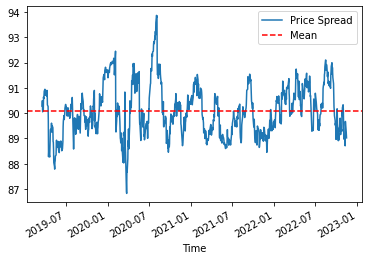

In [99]:
spread.plot() # Plot the spread
plt.axhline(spread.mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean'])

In [100]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

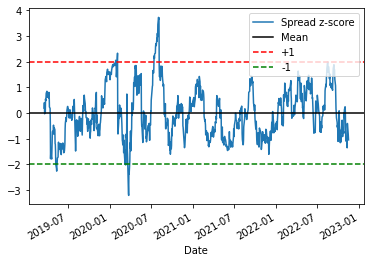

In [101]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1'])